In [63]:
import nanonets
import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import pandas as pd

%matplotlib inline

from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
plt.style.use(["science","bright","grid"])
cm  = plt.get_cmap('cividis')

In [64]:
def self_capacitance_sphere(np_radius):
    e0      = 8.85418781762039e-3
    eps_s   = 3.9
    factor  = 4 * np.pi * e0 * eps_s
    cap     = factor * np_radius
    return cap

In [65]:
cap_vals    = [1e0,5e0,1e1,5e1,1e2,5e2,1e3,5e3,1e4,5e4]
folder      = "/mnt/c/Users/jonas/Desktop/phd/data/2_funding_period/potential/magic_cable/steady_vs_cap/"
data        = {cap : pd.read_csv(f"{folder}Nx=9_Ny=9_Ne=2_{cap}.csv") for cap in cap_vals}
# pot_vals    = 

/tmp/ipykernel_1481/1721598585.py:8: RuntimeWarning: divide by zero encountered in divide
  ax.plot(x*1e3, y/x, color=cm(norm(self_capacitance_sphere(c))))


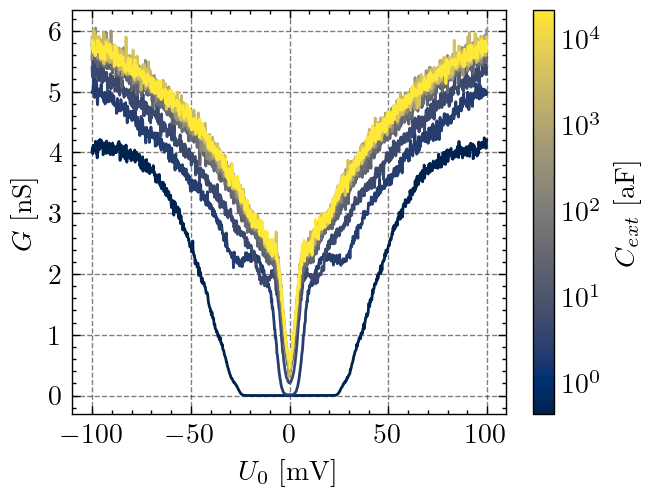

In [66]:
norm = LogNorm(vmin=min(self_capacitance_sphere(np.array(cap_vals))), vmax=max(self_capacitance_sphere(np.array(cap_vals))))
fig  = plt.figure(dpi=200)
ax   = fig.add_subplot()

for c in cap_vals:
    x = data[c]['E0'].values
    y = data[c]['Observable'].values*1e-9
    ax.plot(x*1e3, y/x, color=cm(norm(self_capacitance_sphere(c))))

ax.set_ylabel('$G$ [nS]')
ax.set_xlabel('$U_0$ [mV]')

sm  = ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("$C_{ext}$ [aF]")